In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import scale

In [3]:
lead_score = pd.read_csv('Leads.csv')
lead_score.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
lead_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [5]:
#lets check teh total rows and column
lead_score.shape

(9240, 37)

In [6]:
#lets check the description table for the data
lead_score.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
#lets check for the null values percentage
round(100*(lead_score.isnull().sum(axis=0)/len(lead_score)),3)

Prospect ID                                       0.000
Lead Number                                       0.000
Lead Origin                                       0.000
Lead Source                                       0.390
Do Not Email                                      0.000
Do Not Call                                       0.000
Converted                                         0.000
TotalVisits                                       1.483
Total Time Spent on Website                       0.000
Page Views Per Visit                              1.483
Last Activity                                     1.115
Country                                          26.634
Specialization                                   15.563
How did you hear about X Education               23.885
What is your current occupation                  29.113
What matters most to you in choosing a course    29.318
Search                                            0.000
Magazine                                        

In [8]:
#lets see the count of null values in each column
(lead_score.isnull().sum(axis=0))

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In the data we see that there are many places where they are filled with 'select'.

Since it is not filled it is in the 'select' state, hence we will go ahead and replace it with null

Which will help us to check the exact number of null values in the dataset


In [9]:
# Making 'select' values to Null
lead_score.replace('Select', np.nan, inplace=True)

In [10]:
#recheck teh null values
round(100*(lead_score.isnull().sum(axis =0)/len(lead_score)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [11]:
#lets see the count of null values
lead_score.isnull().sum(axis= 0)

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [12]:
#removing the columns having more than 3000 null values in them
pct_null = lead_score.isnull().sum(axis= 0)
missing_features = pct_null[pct_null > 3000].index
lead_score.drop(missing_features, axis=1, inplace=True)


In [13]:
#recheck the null values
lead_score.isnull().sum(axis =0)

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [14]:
# Again Checking Null values
round(100*(lead_score.isnull().sum(axis=0)/len(lead_score)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [15]:
# lets check the ones whihc are having single values in it
lead_score.describe(include='all').loc['unique', :]

Prospect ID                                      9240
Lead Number                                       NaN
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                         NaN
TotalVisits                                       NaN
Total Time Spent on Website                       NaN
Page Views Per Visit                              NaN
Last Activity                                      17
Country                                            38
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                   

as we can see that there are few columns in which only single values are being present

lets go ahead and remove them

In [16]:
# Removing those columns having only 1 value
lead_score.drop(['I agree to pay the amount through cheque', 'Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content',
                 'Get updates on DM Content'], axis=1, inplace=True)

now lets check the ones whihc are having two values in it

which will help us to understand the importance of them

In [17]:
#lets print the values of count of individual ones in the all columns
print(lead_score['Do Not Email'].value_counts())
print(lead_score['Search'].value_counts())
print(lead_score['Do Not Call'].value_counts())
print(lead_score['Newspaper Article'].value_counts())
print(lead_score['X Education Forums'].value_counts())
print(lead_score['Newspaper'].value_counts())
print(lead_score['Digital Advertisement'].value_counts())
print(lead_score['Through Recommendations'].value_counts())
print(lead_score['A free copy of Mastering The Interview'].value_counts())

No     8506
Yes     734
Name: Do Not Email, dtype: int64
No     9226
Yes      14
Name: Search, dtype: int64
No     9238
Yes       2
Name: Do Not Call, dtype: int64
No     9238
Yes       2
Name: Newspaper Article, dtype: int64
No     9239
Yes       1
Name: X Education Forums, dtype: int64
No     9239
Yes       1
Name: Newspaper, dtype: int64
No     9236
Yes       4
Name: Digital Advertisement, dtype: int64
No     9233
Yes       7
Name: Through Recommendations, dtype: int64
No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64


From the above observations;

we see that the columns "search", "do not call", "newspaper article", "x education forums", " newspaper", "digital advertisement", "Through Recommendations"

are having bery less percentage of data as yes

hence we will go ahead and remove them s it would not provide much insights from the buisness perspective


In [18]:
#lets drop the ones which have less percentage of data
lead_score.drop(["Search","Do Not Call","Newspaper Article","X Education Forums","Newspaper","Digital Advertisement",
                "Through Recommendations"], axis=1, inplace=True)

In [19]:
#checking the null values
round(100*(lead_score.isnull().sum(axis=0)/len(lead_score)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
A free copy of Mastering The Interview            0.00
Last Notable Activity                             0.00
dtype: float64

In [20]:
#lets check the country column and its importance
lead_score.groupby(['Country','Converted']).size().reset_index().rename({0:'Count'},axis=1).sort_values('Count',ascending=False).head(10)

,Country,Converted,Count
19,India,0,4091
20,India,1,2401
52,United States,0,51
48,United Arab Emirates,0,33
49,United Arab Emirates,1,20
53,United States,1,18
36,Saudi Arabia,0,17
38,Singapore,0,13
39,Singapore,1,11
2,Australia,0,10


From the above table it is very evident that the majority of the leads are from India itself

Hence we will go ahead and drop this column, as it doesnot provide insights and not important as well

In [21]:
#lets drop the country column
lead_score.drop('Country',axis=1, inplace = True)

Lets check for What matters most to you in choosing a course

In [22]:
#lets see the count
lead_score['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

Since most of the answers filled is for "better career prospects" hence it it would be much influencing one

Hence lets go ahead and drop the variable


In [23]:
#lets drop the column
lead_score.drop('What matters most to you in choosing a course', axis=1, inplace = True)

In [24]:
#lets see the data
lead_score.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Unemployed,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Unemployed,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Student,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Unemployed,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Unemployed,No,Modified


Lets remove the Prospect ID and Lead number as they are identical to each other and they are for reference

In [25]:
#lets drop the column
lead_score.drop(['Prospect ID', 'Lead Number'], axis=1, inplace= True)

In [26]:
#lets check teh data
lead_score.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Unemployed,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Unemployed,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Unemployed,No,Modified


In [27]:
#lets check the count
lead_score['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Live Chat               2
Social Media            2
Press_Release           2
youtubechannel          1
NC_EDM                  1
welearnblog_Home        1
WeLearn                 1
blog                    1
testone                 1
Pay per Click Ads       1
Name: Lead Source, dtype: int64

we see that the Google is also entered as google in the lead source

hence we will replace the google with Google to make it correct

In [28]:
# Replacing google with Google
lead_score['Lead Source']=lead_score['Lead Source'].replace('google','Google')

In [29]:
#lets check the data before proceeding further fo rnan values
round(100*(lead_score.isnull().sum(axis =0)/len(lead_score)), 2)

Lead Origin                                0.00
Lead Source                                0.39
Do Not Email                               0.00
Converted                                  0.00
TotalVisits                                1.48
Total Time Spent on Website                0.00
Page Views Per Visit                       1.48
Last Activity                              1.11
What is your current occupation           29.11
A free copy of Mastering The Interview     0.00
Last Notable Activity                      0.00
dtype: float64

In [30]:
#lets check the count
lead_score['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

from the above observation, we see that the variable 'what is your current occupation' is having almost 30% of nan values

however when looked into it, we see that there are multiple answers filled for it

hence we will replace teh nan values with other as this looks to be a significant variable for  buisness analysis

In [31]:
#lets replace the nan values with other to overcome
lead_score["What is your current occupation"].fillna('Other',inplace=True)

#lets check the data before proceeding further for nan values
round(100*(lead_score.isnull().sum(axis =0)/len(lead_score)), 2)

Lead Origin                               0.00
Lead Source                               0.39
Do Not Email                              0.00
Converted                                 0.00
TotalVisits                               1.48
Total Time Spent on Website               0.00
Page Views Per Visit                      1.48
Last Activity                             1.11
What is your current occupation           0.00
A free copy of Mastering The Interview    0.00
Last Notable Activity                     0.00
dtype: float64

null value treatment

In [32]:
#  lets remove the rows having null values in it
lead_score.dropna(axis=0, inplace=True)

In [33]:
#lets check the null values percentage
round(100*(lead_score.isnull().sum(axis =0)/len(lead_score)), 2)

Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
What is your current occupation           0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

After the above cleaning and replacement the data appears to be in a good condition

hence we are good to proceed with further analysis and model building

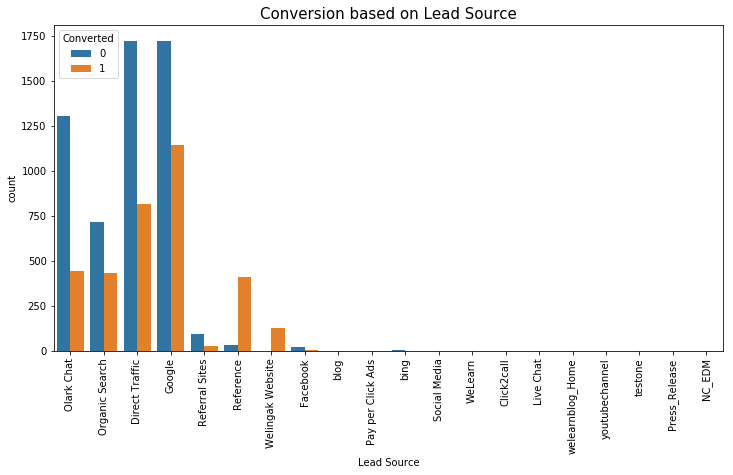

In [34]:
#lets plot the lead source vs conversion
plt.figure(figsize=(12, 6))
sns.countplot(data=lead_score,x='Lead Source',hue='Converted')
plt.title('Conversion based on Lead Source',fontsize=15)
plt.xticks(rotation=90)
plt.show()

we can observe that the top 3 source of leads with higest conversion rates are:
    1. Google
    2. Direct Traffic
    3. Olark chat

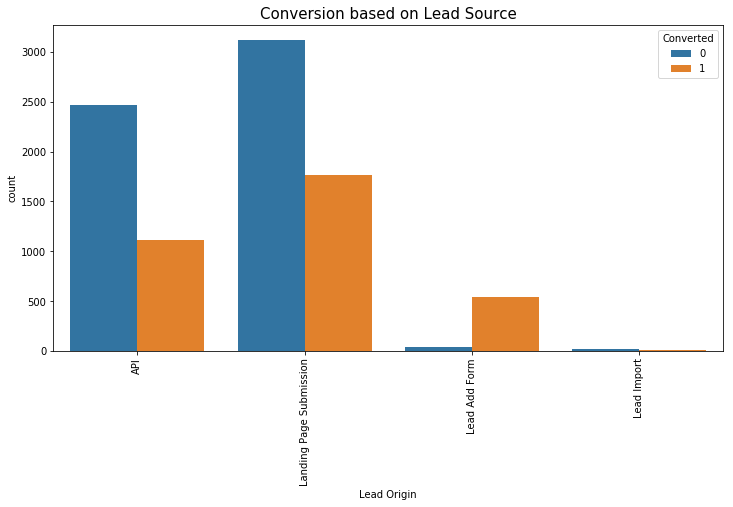

In [35]:
#lets plot lead origin vs conversion
plt.figure(figsize=(12, 6))
sns.countplot(data=lead_score,x='Lead Origin',hue='Converted')
plt.title('Conversion based on Lead Source',fontsize=15)
plt.xticks(rotation=90)
plt.show()

From the above plot we see that the highest conversion rate based on lead source are:
    1. Landing page submission
    2. API

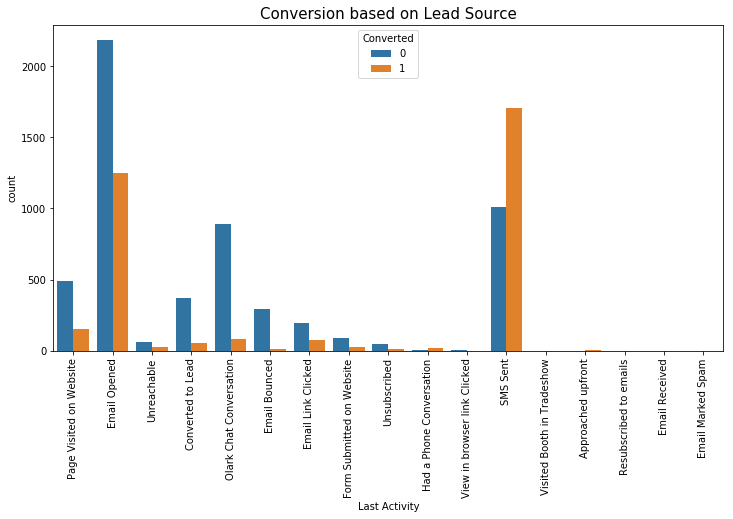

In [38]:
#lets plot the last activity vs conversion
plt.figure(figsize=(12, 6))
sns.countplot(data=lead_score,x='Last Activity',hue='Converted')
plt.title('Conversion based on Lead Source',fontsize=15)
plt.xticks(rotation=90)
plt.show()

Top 3 contributors with high conversion rate of lead are:
    
    1. SMS sent
    2. Email openened
    3. Olark chat conversion

In [40]:
#lets see the data
lead_score.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Unemployed,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Unemployed,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Unemployed,No,Modified


In [41]:
# List of variables to map 
varlist =  ['Do Not Email', 'A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, 'No': 0})

# Applying the function to the housing list
lead_score[varlist] = lead_score[varlist].apply(binary_map)

In [42]:
# Creating dummy variables for categorical variables with more than 2 values
lead_score = pd.get_dummies(lead_score, drop_first=True)

# Shape of dataframe
print(lead_score.shape)


# Inspecting dataframe with all variables including dummy
lead_score.head()

(9074, 64)


,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,2.0,1532,2.0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,0,1,2.0,1428,1.0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [54]:
# Checking for outliers in the continuous variables
num_lead = lead_score[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
num_lead = num_lead.rename(columns={"Total Time Spent on Website": "TotalTimeSpentonWebsite", "Page Views Per Visit": "PageViewsPerVisit"})

In [55]:
#lets see the decription table
num_lead.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,TotalVisits,TotalTimeSpentonWebsite,PageViewsPerVisit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
90%,7.000000,1373.000000,5.000000
95%,10.000000,1557.000000,6.000000
99%,17.000000,1839.000000,9.000000


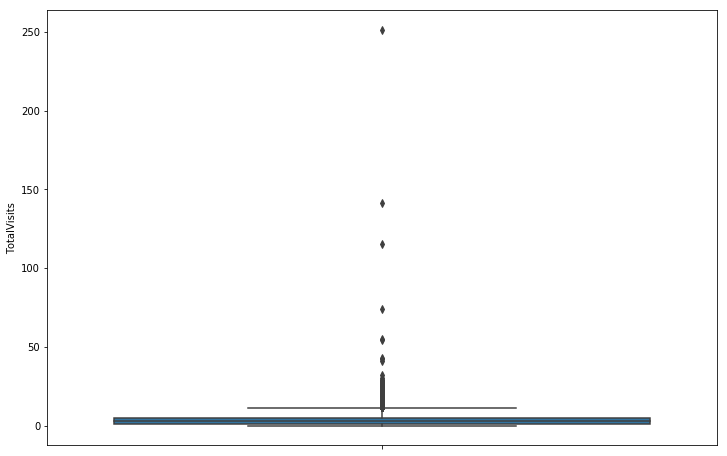

In [60]:
# Boxplot for all component to identify outliers
plt.figure(figsize=(12,8))
sns.boxplot(x = num_lead.TotalVisits , orient='v')
plt.show()

we can see that the outliers are being present in the totalvisits 

Lets go ahead and remove them

In [57]:
# Removing outlier
TotalVisits=lead_score["TotalVisits"].quantile(.99)
len(lead_score.loc[(lead_score["TotalVisits"] > TotalVisits)])

83

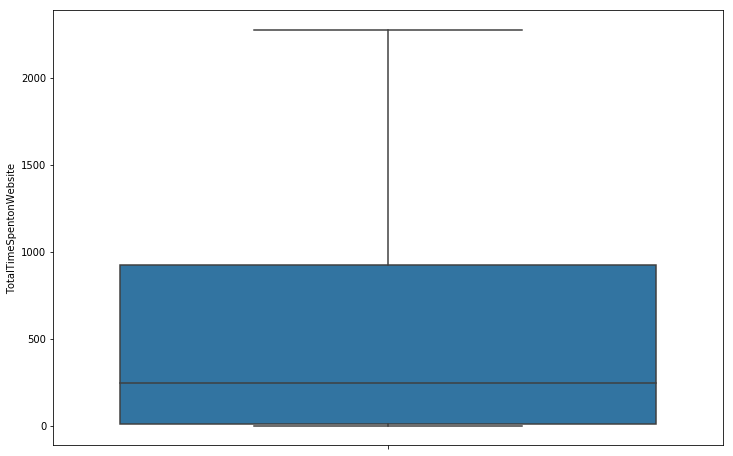

In [59]:
# Boxplot for all component to identify outliers
plt.figure(figsize=(12,8))
sns.boxplot(x = num_lead.TotalTimeSpentonWebsite , orient='v')
plt.show()

Seems like there are no outliers preset in total time spent on website

Hence lets proceed further

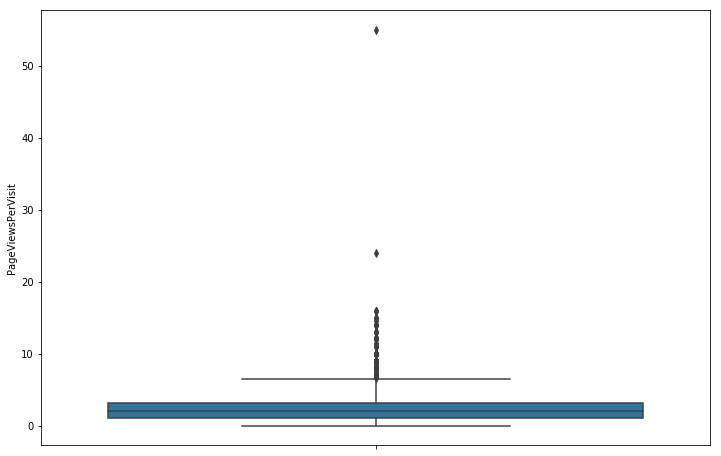

In [62]:
#box plot for page view per visit
plt.figure(figsize = (12,8))
sns.boxplot(x= num_lead.PageViewsPerVisit, orient = 'v')
plt.show()

We can see that the outliers are being present

lets remove them

In [64]:
#lets remove the outliers
PageViewsPerVisit=lead_score["Page Views Per Visit"].quantile(.99)
len(lead_score.loc[(lead_score["Page Views Per Visit"] > PageViewsPerVisit)])

75

In [65]:
#lets remove see the outliers
lead_score = lead_score.loc[(lead_score["TotalVisits"] <= TotalVisits) & 
                            (lead_score["Page Views Per Visit"] <= PageViewsPerVisit)]

In [66]:
# Dataframe after outlier removal
lead_score.shape

(8924, 64)

In [68]:
lead_score.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,2.0,1532,2.0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,0,1,2.0,1428,1.0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


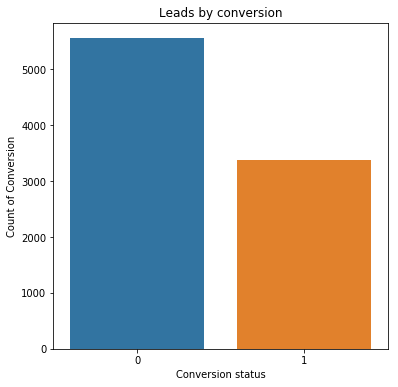

In [67]:
# Checking the converted and not converted leads in the data after the data cleaning and outlier removal
plt.figure(figsize=(6, 6))
sns.countplot(x="Converted", data=lead_score)
plt.title('Leads by conversion')
plt.ylabel('Count of Conversion')
plt.xlabel('Conversion status')
plt.show()

In [69]:
# Importing sklearn for test-train split
from sklearn.model_selection import train_test_split
# lets put the 'X'
X = lead_score.drop(['Converted'], axis=1)
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2.0,1532,2.0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,0,2.0,1428,1.0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [70]:
# output response to y
y = lead_score['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [71]:
# Splitting the 'X' and 'Y' into test and train 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

# Scaling

In [72]:
#importing the function
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website',
                                                                                           'Page Views Per Visit']])

X_train.head()

C:\Users\metimats\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\metimats\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\metimats\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\metimats\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A v

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
6676,0,-0.049636,1.395668,0.395289,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6138,0,0.297929,0.609686,0.926758,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8650,0,-0.049636,1.178657,0.395289,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3423,0,-1.092332,-0.878390,-1.199117,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
6552,0,-1.092332,-0.878390,-1.199117,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Lets check the Correlation matrix for highly correlated variables
corr = X_train.corr() 
cm = sns.light_palette("skyblue", as_cmap=True) 
corr.style.background_gradient(cmap=cm).set_precision(2)

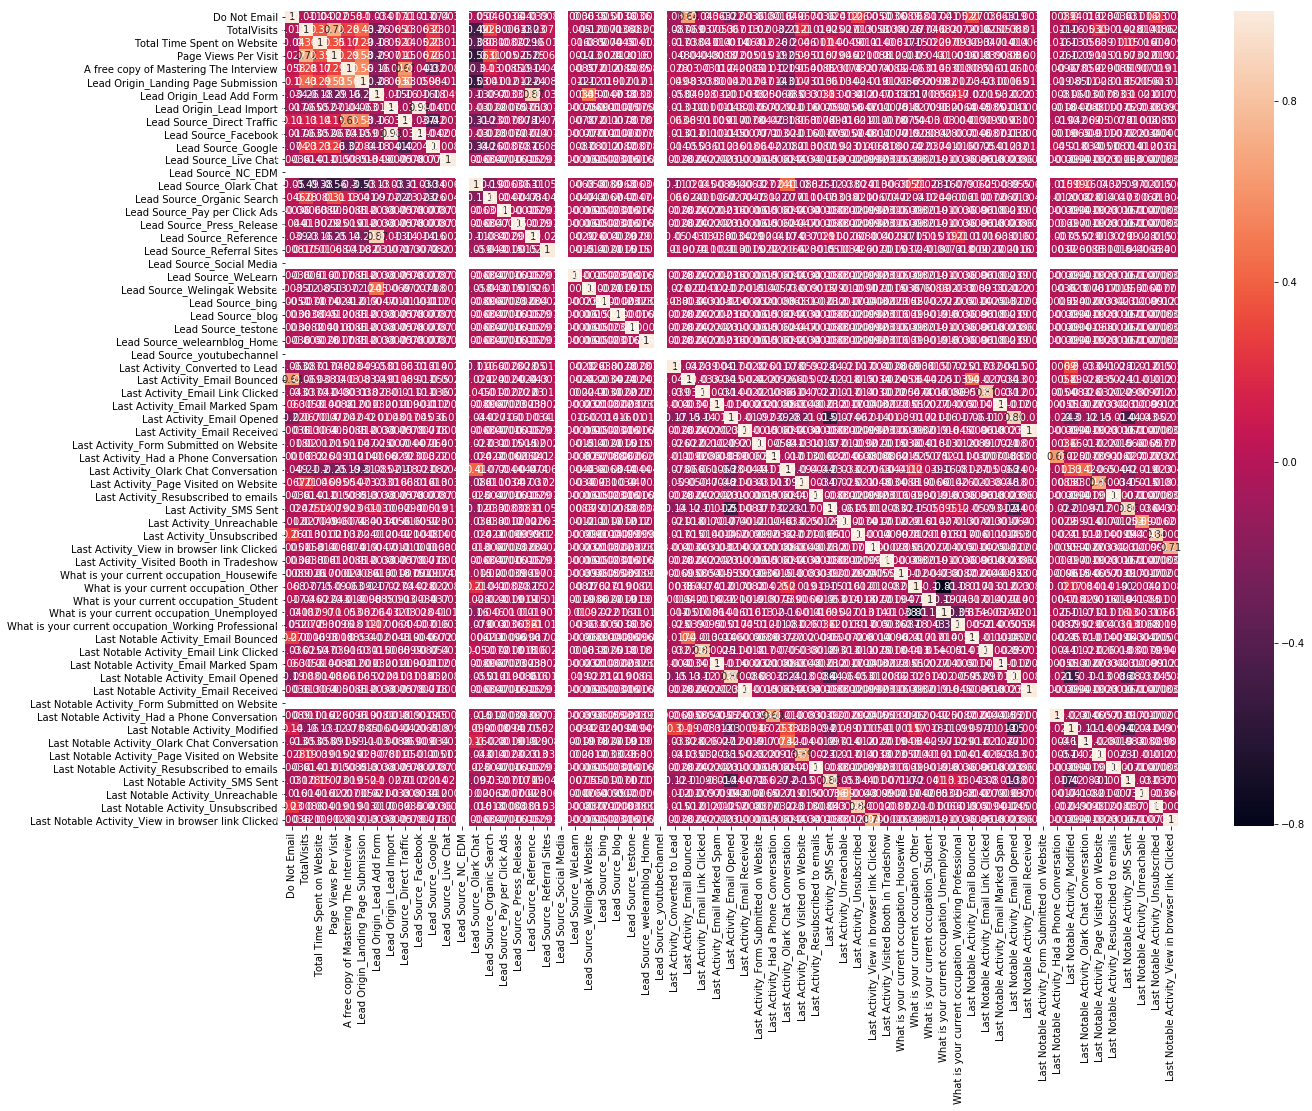

In [75]:
#correlation matrix
plt.figure(figsize = (20, 15))
sns.heatmap(X_train.corr(), annot = True)
plt.show()

In [76]:
# Selecting only columns which are having correlation value more than 0.70
rows, cols = X_train.shape
col = list(X_train.columns)

corr = X_train.corr().values

for i in range(cols):
    for j in range(i+1, cols):
        if corr[i,j] > 0.7:
            print(col[i], ' ', col[j], ' ', corr[i,j])

TotalVisits   Page Views Per Visit   0.7169054649364854
Lead Origin_Lead Add Form   Lead Source_Reference   0.8693623102448113
Lead Origin_Lead Import   Lead Source_Facebook   0.9779407222995746
Last Activity_Email Link Clicked   Last Notable Activity_Email Link Clicked   0.8123515620946862
Last Activity_Email Marked Spam   Last Notable Activity_Email Marked Spam   1.0
Last Activity_Email Opened   Last Notable Activity_Email Opened   0.8627365854410947
Last Activity_Email Received   Last Notable Activity_Email Received   1.0
Last Activity_Resubscribed to emails   Last Notable Activity_Resubscribed to emails   1.0
Last Activity_SMS Sent   Last Notable Activity_SMS Sent   0.8596571993302209
Last Activity_Unsubscribed   Last Notable Activity_Unsubscribed   0.8421814269767547
Last Activity_View in browser link Clicked   Last Notable Activity_View in browser link Clicked   0.7070501650864086


In [80]:
# lets remove the Highly corelated variables
X_train.drop(['Lead Source_Reference','Lead Source_Facebook','Last Notable Activity_Email Link Clicked',
              'Last Notable Activity_Email Marked Spam','Last Notable Activity_Email Opened','Last Notable Activity_Email Received',
              'Last Notable Activity_Resubscribed to emails','Last Notable Activity_SMS Sent', 'Last Notable Activity_Unsubscribed',
              'Last Notable Activity_View in browser link Clicked'], axis=1, inplace=True)

X_test.drop(['Lead Source_Reference','Lead Source_Facebook','Last Notable Activity_Email Link Clicked',
              'Last Notable Activity_Email Marked Spam','Last Notable Activity_Email Opened','Last Notable Activity_Email Received',
              'Last Notable Activity_Resubscribed to emails','Last Notable Activity_SMS Sent', 'Last Notable Activity_Unsubscribed',
              'Last Notable Activity_View in browser link Clicked'], axis=1, inplace=True)

C:\Users\metimats\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


# Model Building

In [81]:
# Importing the libraries for modelling purpose
import statsmodels.api as sm
from sklearn import metrics

In [82]:
# Lets run the logistic regression model on the split data
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6196
Model Family:                Binomial   Df Model:                           49
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2466.6
Date:                Mon, 26 Aug 2019   Deviance:                       4933.2
Time:                        09:04:53   Pearson chi2:                 6.28e+03
No. Iterations:                    22   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   23.8913   4.13e+04      0.001      1.000    -8.1e+04    8.11e+04
Do Not Email                                            -1.3568      0.229     -5.918      0.000      -1.806      -0.907
TotalVisits                                              0.3423      0.054      6.396      0.000       0.237       0.447
Total Time Spent on Website                              1.0957      0.042     26.183      0.000       1.014       1.178
Page Views Per Visit                                    -0.3030      0.059     -5.114      0.000      -0.419      -0.187
A free copy of Mastering The Interview                  -0.0481      0.112     -0.430      0.667      -0.267       0.171
Lead Origin_Landing Page Submission                     -0.1544      0.110     -1.401      0.161      -0.371       0.062
Lead Origin_Lead Add Form                                2.7926      1.414      1.976      0.048       0.022       5.563
Lead Origin_Lead Import                                  0.1590      1.498      0.106      0.915      -2.777       3.095
Lead Source_Direct Traffic                              -0.8560      1.416     -0.604      0.546      -3.631       1.919
Lead Source_Google                                      -0.5155      1.413     -0.365      0.715      -3.285       2.254
Lead Source_Live Chat                                   20.5891    7.9e+04      0.000      1.000   -1.55e+05    1.55e+05
Lead Source_NC_EDM                                   -3.022e-09   1.27e-05     -0.000      1.000   -2.49e-05    2.49e-05
Lead Source_Olark Chat                                   0.4867      1.417      0.343      0.731      -2.290       3.264
Lead Source_Organic Search                              -0.6902      1.417     -0.487      0.626      -3.468       2.087
Lead Source_Pay per Click Ads                          -23.0803    1.1e+05     -0.000      1.000   -2.15e+05    2.15e+05
Lead Source_Press_Release                              -20.9368    9.3e+04     -0.000      1.000   -1.82e+05    1.82e+05
Lead Source_Referral Sites                              -0.8527      1.453     -0.587      0.557      -3.701       1.995
Lead Source_Social Media                             -4.959e-09   1.79e-05     -0.000      1.000   -3.51e-05    3.51e-05
Lead Source_WeLearn                                     22.7688   8.92e+04      0.000      1.000   -1.75e+05    1.75e+05
Lead Source_Welingak Website                             1.7097      0.755      2.265      0.024       0.230       3.189
Lead Source_bing                                       -20.6524   5.22e+04     -0.000      1.000   -1.02e+05    1.02e+05
Lead Source_blog                                       -22.4077   8.18e+04     -0.000      1.000    -1.6e+05     1.6e+05
Lead Source_test

RFE method for selection

In [83]:
# Importing RFE and LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

In [84]:
#lets select the top 30 variables to proceed further
rfe = RFE(logreg, 30)             
rfe = rfe.fit(X_train, y_train)

C:\Users\metimats\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\metimats\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\metimats\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\metimats\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\metimats\AppData\Local\Continuum\anaconda3\lib\site-package

In [85]:
rfe.support_

array([ True,  True,  True,  True, False, False,  True, False,  True,
        True, False, False,  True,  True, False, False,  True, False,
       False,  True, False, False, False, False, False,  True,  True,
       False,  True, False, False, False,  True,  True, False,  True,
        True, False,  True,  True, False,  True,  True,  True,  True,
        True, False, False,  True,  True,  True,  True,  True])

In [86]:
# Selecting only the columns which are selected by RFE
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_Lead Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Marked Spam',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Resubscribed to emails', 'Last Activity_SMS Sent',
       'Last Activity_Unsubscribed',
       'Last Activity_View in browser link Clicked',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Pho

In [87]:
#adding a constant
X_train_sm = sm.add_constant(X_train[col])

# Running Logistic regression model
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6215
Model Family:                Binomial   Df Model:                           30
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2475.2
Date:                Mon, 26 Aug 2019   Deviance:                       4950.3
Time:                        09:12:09   Pearson chi2:                 6.27e+03
No. Iterations:                    22   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1043      1.707     -0.061      0.951      -3.450       3.241
Do Not Email                                            -1.3599      0.226     -6.009      0.000      -1.803      -0.916
TotalVisits                                              0.3357      0.053      6.334      0.000       0.232       0.440
Total Time Spent on Website                              1.0996      0.042     26.327      0.000       1.018       1.181
Page Views Per Visit                                    -0.3245      0.058     -5.640      0.000      -0.437      -0.212
Lead Origin_Lead Add Form                                2.8209      0.475      5.939      0.000       1.890       3.752
Lead Source_Direct Traffic                              -0.9802      0.440     -2.228      0.026      -1.843      -0.118
Lead Source_Google                                      -0.5526      0.439     -1.258      0.208      -1.413       0.308
Lead Source_Olark Chat                                   0.5103      0.437      1.168      0.243      -0.346       1.366
Lead Source_Organic Search                              -0.7230      0.451     -1.603      0.109      -1.607       0.161
Lead Source_Referral Sites                              -0.8250      0.550     -1.500      0.134      -1.903       0.253
Lead Source_Welingak Website                             1.7084      0.755      2.264      0.024       0.229       3.187
Last Activity_Converted to Lead                         -0.6979      0.237     -2.951      0.003      -1.161      -0.234
Last Activity_Email Bounced                             -0.6033      0.431     -1.400      0.162      -1.448       0.241
Last Activity_Email Marked Spam                         23.0597   5.56e+04      0.000      1.000   -1.09e+05    1.09e+05
Last Activity_Had a Phone Conversation                   2.4054      0.989      2.432      0.015       0.467       4.344
Last Activity_Olark Chat Conversation                   -0.9867      0.206     -4.798      0.000      -1.390      -0.584
Last Activity_Resubscribed to emails                    25.3467   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Last Activity_SMS Sent                                   1.3036      0.080     16.281      0.000       1.147       1.461
Last Activity_Unsubscribed                               0.8482      0.568      1.494      0.135      -0.265       1.961
Last Activity_View in browser link Clicked             -22.4066   5.61e+04     -0.000      1.000    -1.1e+05     1.1e+05
What is your current occupation_Housewife               23.8245   2.85e+04      0.001      0.999   -5.58e+04    5.59e+04
What is your current occupation_Other                   -1.2432      1.653     -0.752      0.452      -4.483       1.996
What is your cur

In [88]:
#Lets get the predicted values on the train set
y_train_pred = pd.DataFrame(res.predict(X_train_sm))
y_train_pred = y_train_pred.values.reshape(-1)

In [89]:
## Creating a dataframe with the actual Converted data and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Convert_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index

##### lets create a column 'predicted' assigning the value as 1 if prob of conversion is above 0.5 else as 0
y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Convert_Prob,LeadID,predicted
0,1,0.551830,6676,1
1,1,0.734836,6138,1
2,1,0.920502,8650,1
3,0,0.031934,3423,0
4,0,0.144225,6552,0


In [90]:
#lets look at the accuracy of this model
acc = metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)
print(acc)

0.8224463656740314


We see that the accuracy of the model is 0.8222

Lets proceed with rmeoving the insignificant variables to model it further precisely

In [92]:
col = col.drop('Last Activity_Email Marked Spam')
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_Lead Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Resubscribed to emails', 'Last Activity_SMS Sent',
       'Last Activity_Unsubscribed',
       'Last Activity_View in browser link Clicked',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Act

In [93]:
#adding a constant
X_train_sm = sm.add_constant(X_train[col])

# Running Logistic regression model
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6216
Model Family:                Binomial   Df Model:                           29
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2476.1
Date:                Mon, 26 Aug 2019   Deviance:                       4952.2
Time:                        09:23:55   Pearson chi2:                 6.28e+03
No. Iterations:                    22   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1102      1.710     -0.064      0.949      -3.462       3.242
Do Not Email                                            -1.3237      0.223     -5.940      0.000      -1.760      -0.887
TotalVisits                                              0.3369      0.053      6.361      0.000       0.233       0.441
Total Time Spent on Website                              1.1005      0.042     26.364      0.000       1.019       1.182
Page Views Per Visit                                    -0.3255      0.058     -5.659      0.000      -0.438      -0.213
Lead Origin_Lead Add Form                                2.8378      0.475      5.973      0.000       1.907       3.769
Lead Source_Direct Traffic                              -0.9815      0.440     -2.231      0.026      -1.844      -0.119
Lead Source_Google                                      -0.5548      0.439     -1.263      0.207      -1.416       0.306
Lead Source_Olark Chat                                   0.5093      0.437      1.166      0.244      -0.347       1.365
Lead Source_Organic Search                              -0.7254      0.451     -1.609      0.108      -1.609       0.158
Lead Source_Referral Sites                              -0.8269      0.550     -1.503      0.133      -1.905       0.251
Lead Source_Welingak Website                             1.6862      0.755      2.235      0.025       0.207       3.165
Last Activity_Converted to Lead                         -0.6972      0.237     -2.948      0.003      -1.161      -0.234
Last Activity_Email Bounced                             -0.6363      0.430     -1.481      0.139      -1.478       0.206
Last Activity_Had a Phone Conversation                   2.4000      0.987      2.432      0.015       0.466       4.334
Last Activity_Olark Chat Conversation                   -0.9863      0.206     -4.795      0.000      -1.389      -0.583
Last Activity_Resubscribed to emails                    25.3459   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Last Activity_SMS Sent                                   1.3004      0.080     16.251      0.000       1.144       1.457
Last Activity_Unsubscribed                               0.8126      0.567      1.434      0.152      -0.298       1.923
Last Activity_View in browser link Clicked             -22.4073   5.61e+04     -0.000      1.000    -1.1e+05     1.1e+05
What is your current occupation_Housewife               23.8318   2.85e+04      0.001      0.999   -5.58e+04    5.58e+04
What is your current occupation_Other                   -1.2346      1.656     -0.745      0.456      -4.481       2.012
What is your current occupation_Student                 -0.0835      1.669     -0.050      0.960      -3.354       3.187
What is your cur

In [94]:
#Lets get the predicted values on the train set
y_train_pred = pd.DataFrame(res.predict(X_train_sm))
y_train_pred = y_train_pred.values.reshape(-1)

In [95]:
## Creating a dataframe with the actual Converted data and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Convert_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index

##### lets create a column 'predicted' assigning the value as 1 if prob of conversion is above 0.5 else as 0
y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Convert_Prob,LeadID,predicted
0,1,0.552470,6676,1
1,1,0.734373,6138,1
2,1,0.920607,8650,1
3,0,0.031907,3423,0
4,0,0.144318,6552,0


In [96]:
#lets look at the accuracy of this model
acc = metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)
print(acc)

0.8226064681396094


We can see that the accuracy has not been dropped

so lets proceed further in removing some more insignificant variables to analyse

In [97]:
#lets drop the column
col = col.drop('Last Activity_Resubscribed to emails')
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_Lead Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Last Activity_Unsubscribed',
       'Last Activity_View in browser link Clicked',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_

In [98]:
#adding a constant
X_train_sm = sm.add_constant(X_train[col])

# Running Logistic regression model
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6217
Model Family:                Binomial   Df Model:                           28
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2478.0
Date:                Mon, 26 Aug 2019   Deviance:                       4956.1
Time:                        09:30:59   Pearson chi2:                 6.28e+03
No. Iterations:                    21   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1089      1.710     -0.064      0.949      -3.461       3.244
Do Not Email                                            -1.3233      0.223     -5.939      0.000      -1.760      -0.887
TotalVisits                                              0.3365      0.053      6.355      0.000       0.233       0.440
Total Time Spent on Website                              1.1002      0.042     26.362      0.000       1.018       1.182
Page Views Per Visit                                    -0.3254      0.057     -5.660      0.000      -0.438      -0.213
Lead Origin_Lead Add Form                                2.8382      0.475      5.975      0.000       1.907       3.769
Lead Source_Direct Traffic                              -0.9811      0.440     -2.230      0.026      -1.843      -0.119
Lead Source_Google                                      -0.5544      0.439     -1.263      0.207      -1.415       0.306
Lead Source_Olark Chat                                   0.5142      0.437      1.178      0.239      -0.342       1.370
Lead Source_Organic Search                              -0.7247      0.451     -1.608      0.108      -1.608       0.159
Lead Source_Referral Sites                              -0.8266      0.550     -1.503      0.133      -1.905       0.251
Lead Source_Welingak Website                             1.6867      0.755      2.235      0.025       0.208       3.166
Last Activity_Converted to Lead                         -0.6968      0.236     -2.946      0.003      -1.160      -0.233
Last Activity_Email Bounced                             -0.6380      0.430     -1.485      0.138      -1.480       0.204
Last Activity_Had a Phone Conversation                   2.3998      0.987      2.432      0.015       0.466       4.334
Last Activity_Olark Chat Conversation                   -0.9899      0.206     -4.814      0.000      -1.393      -0.587
Last Activity_SMS Sent                                   1.2981      0.080     16.230      0.000       1.141       1.455
Last Activity_Unsubscribed                               0.8099      0.567      1.429      0.153      -0.301       1.921
Last Activity_View in browser link Clicked             -21.4094    3.4e+04     -0.001      0.999   -6.67e+04    6.66e+04
What is your current occupation_Housewife               22.8305   1.73e+04      0.001      0.999   -3.38e+04    3.39e+04
What is your current occupation_Other                   -1.2307      1.656     -0.743      0.458      -4.477       2.016
What is your current occupation_Student                 -0.0851      1.669     -0.051      0.959      -3.356       3.186
What is your current occupation_Unemployed              -0.0891      1.655     -0.054      0.957      -3.332       3.154
What is your cur

In [99]:
#Lets get the predicted values on the train set
y_train_pred = pd.DataFrame(res.predict(X_train_sm))
y_train_pred = y_train_pred.values.reshape(-1)

In [100]:
## Creating a dataframe with the actual Converted data and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Convert_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index

##### lets create a column 'predicted' assigning the value as 1 if prob of conversion is above 0.5 else as 0
y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Convert_Prob,LeadID,predicted
0,1,0.552556,6676,1
1,1,0.734028,6138,1
2,1,0.920645,8650,1
3,0,0.032074,3423,0
4,0,0.145655,6552,0


In [101]:
#lets look at the accuracy of this model
acc = metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)
print(acc)

0.8224463656740314


In [102]:
#lets drop the column
col = col.drop('What is your current occupation_Unemployed')
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_Lead Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Last Activity_Unsubscribed',
       'Last Activity_View in browser link Clicked',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activi

In [104]:
#adding a constant
X_train_sm = sm.add_constant(X_train[col])

# Running Logistic regression model
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6218
Model Family:                Binomial   Df Model:                           27
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2478.0
Date:                Mon, 26 Aug 2019   Deviance:                       4956.1
Time:                        09:36:17   Pearson chi2:                 6.28e+03
No. Iterations:                    21   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1980      0.433     -0.458      0.647      -1.046       0.650
Do Not Email                                            -1.3233      0.223     -5.939      0.000      -1.760      -0.887
TotalVisits                                              0.3365      0.053      6.356      0.000       0.233       0.440
Total Time Spent on Website                              1.1001      0.042     26.363      0.000       1.018       1.182
Page Views Per Visit                                    -0.3255      0.057     -5.660      0.000      -0.438      -0.213
Lead Origin_Lead Add Form                                2.8389      0.475      5.978      0.000       1.908       3.770
Lead Source_Direct Traffic                              -0.9810      0.440     -2.230      0.026      -1.843      -0.119
Lead Source_Google                                      -0.5544      0.439     -1.263      0.207      -1.415       0.306
Lead Source_Olark Chat                                   0.5142      0.437      1.178      0.239      -0.342       1.370
Lead Source_Organic Search                              -0.7247      0.451     -1.608      0.108      -1.608       0.159
Lead Source_Referral Sites                              -0.8266      0.550     -1.503      0.133      -1.905       0.251
Lead Source_Welingak Website                             1.6859      0.754      2.235      0.025       0.207       3.165
Last Activity_Converted to Lead                         -0.6970      0.236     -2.948      0.003      -1.160      -0.234
Last Activity_Email Bounced                             -0.6380      0.430     -1.485      0.137      -1.480       0.204
Last Activity_Had a Phone Conversation                   2.3996      0.987      2.432      0.015       0.466       4.334
Last Activity_Olark Chat Conversation                   -0.9901      0.206     -4.816      0.000      -1.393      -0.587
Last Activity_SMS Sent                                   1.2981      0.080     16.231      0.000       1.141       1.455
Last Activity_Unsubscribed                               0.8099      0.567      1.429      0.153      -0.301       1.921
Last Activity_View in browser link Clicked             -21.4095    3.4e+04     -0.001      0.999   -6.67e+04    6.66e+04
What is your current occupation_Housewife               22.9195   1.73e+04      0.001      0.999   -3.38e+04    3.39e+04
What is your current occupation_Other                   -1.1416      0.089    -12.768      0.000      -1.317      -0.966
What is your current occupation_Student                  0.0039      0.231      0.017      0.987      -0.449       0.457
What is your current occupation_Working Professional     2.4788      0.190     13.048      0.000       2.106       2.851
Last Notable Act

In [105]:
#Lets get the predicted values on the train set
y_train_pred = pd.DataFrame(res.predict(X_train_sm))
y_train_pred = y_train_pred.values.reshape(-1)

In [106]:
## Creating a dataframe with the actual Converted data and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Convert_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index

##### lets create a column 'predicted' assigning the value as 1 if prob of conversion is above 0.5 else as 0
y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Convert_Prob,LeadID,predicted
0,1,0.552573,6676,1
1,1,0.734011,6138,1
2,1,0.920645,8650,1
3,0,0.032074,3423,0
4,0,0.145651,6552,0


In [107]:
#lets look at the accuracy of this model
acc = metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)
print(acc)

0.8224463656740314


In [108]:
#lets drop the column
col = col.drop('Last Activity_View in browser link Clicked')
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_Lead Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Last Activity_Unsubscribed',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Act

In [109]:
#adding a constant
X_train_sm = sm.add_constant(X_train[col])

# Running Logistic regression model
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6219
Model Family:                Binomial   Df Model:                           26
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2478.6
Date:                Mon, 26 Aug 2019   Deviance:                       4957.2
Time:                        09:38:36   Pearson chi2:                 6.28e+03
No. Iterations:                    21   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1982      0.433     -0.458      0.647      -1.046       0.650
Do Not Email                                            -1.3234      0.223     -5.939      0.000      -1.760      -0.887
TotalVisits                                              0.3356      0.053      6.340      0.000       0.232       0.439
Total Time Spent on Website                              1.1007      0.042     26.378      0.000       1.019       1.183
Page Views Per Visit                                    -0.3248      0.057     -5.650      0.000      -0.437      -0.212
Lead Origin_Lead Add Form                                2.8393      0.475      5.979      0.000       1.908       3.770
Lead Source_Direct Traffic                              -0.9816      0.440     -2.231      0.026      -1.844      -0.119
Lead Source_Google                                      -0.5559      0.439     -1.266      0.206      -1.417       0.305
Lead Source_Olark Chat                                   0.5124      0.437      1.174      0.241      -0.343       1.368
Lead Source_Organic Search                              -0.7251      0.451     -1.608      0.108      -1.609       0.158
Lead Source_Referral Sites                              -0.8268      0.550     -1.503      0.133      -1.905       0.251
Lead Source_Welingak Website                             1.6858      0.754      2.234      0.025       0.207       3.164
Last Activity_Converted to Lead                         -0.6958      0.236     -2.942      0.003      -1.159      -0.232
Last Activity_Email Bounced                             -0.6369      0.430     -1.482      0.138      -1.479       0.205
Last Activity_Had a Phone Conversation                   2.4008      0.987      2.433      0.015       0.466       4.335
Last Activity_Olark Chat Conversation                   -0.9877      0.206     -4.805      0.000      -1.391      -0.585
Last Activity_SMS Sent                                   1.2991      0.080     16.244      0.000       1.142       1.456
Last Activity_Unsubscribed                               0.8107      0.567      1.430      0.153      -0.300       1.922
What is your current occupation_Housewife               22.9206   1.73e+04      0.001      0.999   -3.38e+04    3.39e+04
What is your current occupation_Other                   -1.1406      0.089    -12.757      0.000      -1.316      -0.965
What is your current occupation_Student                  0.0048      0.231      0.021      0.984      -0.448       0.458
What is your current occupation_Working Professional     2.4796      0.190     13.051      0.000       2.107       2.852
Last Notable Activity_Had a Phone Conversation          20.8863   1.71e+04      0.001      0.999   -3.34e+04    3.35e+04
Last Notable Act

In [110]:
#Lets get the predicted values on the train set
y_train_pred = pd.DataFrame(res.predict(X_train_sm))
y_train_pred = y_train_pred.values.reshape(-1)

In [111]:
# Creating a dataframe with the actual Converted data and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Convert_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index

#lets create a column 'predicted' assigning the value as 1 if prob of conversion is above 0.5 else as 0
y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Convert_Prob,LeadID,predicted
0,1,0.552676,6676,1
1,1,0.734028,6138,1
2,1,0.920724,8650,1
3,0,0.032080,3423,0
4,0,0.145510,6552,0


In [112]:
#lets look at the accuracy of this model
acc = metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)
print(acc)

0.8224463656740314


In [113]:
#lets drop the column
col = col.drop('What is your current occupation_Housewife')
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_Lead Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Last Activity_Unsubscribed', 'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [114]:
#adding a constant
X_train_sm = sm.add_constant(X_train[col])

# Running Logistic regression model
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6220
Model Family:                Binomial   Df Model:                           25
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2483.6
Date:                Mon, 26 Aug 2019   Deviance:                       4967.1
Time:                        09:49:28   Pearson chi2:                 6.29e+03
No. Iterations:                    21   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1984      0.433     -0.459      0.647      -1.046       0.649
Do Not Email                                            -1.3246      0.223     -5.946      0.000      -1.761      -0.888
TotalVisits                                              0.3334      0.053      6.303      0.000       0.230       0.437
Total Time Spent on Website                              1.1004      0.042     26.399      0.000       1.019       1.182
Page Views Per Visit                                    -0.3271      0.057     -5.694      0.000      -0.440      -0.214
Lead Origin_Lead Add Form                                2.8473      0.475      5.997      0.000       1.917       3.778
Lead Source_Direct Traffic                              -0.9725      0.440     -2.211      0.027      -1.834      -0.111
Lead Source_Google                                      -0.5463      0.439     -1.244      0.213      -1.407       0.314
Lead Source_Olark Chat                                   0.5121      0.437      1.173      0.241      -0.343       1.368
Lead Source_Organic Search                              -0.7059      0.451     -1.567      0.117      -1.589       0.177
Lead Source_Referral Sites                              -0.8204      0.550     -1.492      0.136      -1.898       0.257
Lead Source_Welingak Website                             1.6754      0.754      2.221      0.026       0.197       3.154
Last Activity_Converted to Lead                         -0.7087      0.236     -2.999      0.003      -1.172      -0.245
Last Activity_Email Bounced                             -0.6452      0.429     -1.502      0.133      -1.487       0.197
Last Activity_Had a Phone Conversation                   2.3840      0.987      2.415      0.016       0.450       4.318
Last Activity_Olark Chat Conversation                   -0.9948      0.206     -4.841      0.000      -1.398      -0.592
Last Activity_SMS Sent                                   1.2916      0.080     16.167      0.000       1.135       1.448
Last Activity_Unsubscribed                               0.8038      0.567      1.418      0.156      -0.307       1.915
What is your current occupation_Other                   -1.1449      0.089    -12.812      0.000      -1.320      -0.970
What is your current occupation_Student                 -0.0012      0.231     -0.005      0.996      -0.454       0.452
What is your current occupation_Working Professional     2.4740      0.190     13.023      0.000       2.102       2.846
Last Notable Activity_Had a Phone Conversation          20.8973   1.71e+04      0.001      0.999   -3.34e+04    3.34e+04
Last Notable Activity_Modified                          -0.6466      0.092     -7.049      0.000      -0.826      -0.467
Last Notable Act

In [115]:
#Lets get the predicted values on the train set
y_train_pred = pd.DataFrame(res.predict(X_train_sm))
y_train_pred = y_train_pred.values.reshape(-1)

In [116]:
# Creating a dataframe with the actual Converted data and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Convert_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index

#lets create a column 'predicted' assigning the value as 1 if prob of conversion is above 0.5 else as 0
y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Convert_Prob,LeadID,predicted
0,1,0.554554,6676,1
1,1,0.733809,6138,1
2,1,0.920873,8650,1
3,0,0.031953,3423,0
4,0,0.145580,6552,0


In [117]:
#lets look at the accuracy of this model
acc = metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)
print(acc)

0.8221261607428755


Since the accuracy hasnt dropped

lets remove variables which are still having high p values and check for it

In [118]:
#lets drop the column
col = col.drop('What is your current occupation_Student')
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_Lead Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Last Activity_Unsubscribed', 'What is your current occupation_Other',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [119]:
#adding a constant
X_train_sm = sm.add_constant(X_train[col])

# Running Logistic regression model
logm8 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm8.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6221
Model Family:                Binomial   Df Model:                           24
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2483.6
Date:                Mon, 26 Aug 2019   Deviance:                       4967.1
Time:                        10:03:35   Pearson chi2:                 6.29e+03
No. Iterations:                    21   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1985      0.432     -0.459      0.646      -1.046       0.649
Do Not Email                                            -1.3246      0.223     -5.947      0.000      -1.761      -0.888
TotalVisits                                              0.3334      0.053      6.305      0.000       0.230       0.437
Total Time Spent on Website                              1.1004      0.042     26.400      0.000       1.019       1.182
Page Views Per Visit                                    -0.3271      0.057     -5.694      0.000      -0.440      -0.214
Lead Origin_Lead Add Form                                2.8473      0.475      5.997      0.000       1.917       3.778
Lead Source_Direct Traffic                              -0.9725      0.440     -2.211      0.027      -1.834      -0.111
Lead Source_Google                                      -0.5463      0.439     -1.244      0.213      -1.407       0.314
Lead Source_Olark Chat                                   0.5121      0.437      1.173      0.241      -0.343       1.368
Lead Source_Organic Search                              -0.7058      0.451     -1.567      0.117      -1.589       0.177
Lead Source_Referral Sites                              -0.8204      0.550     -1.492      0.136      -1.898       0.257
Lead Source_Welingak Website                             1.6755      0.754      2.221      0.026       0.197       3.154
Last Activity_Converted to Lead                         -0.7087      0.236     -2.999      0.003      -1.172      -0.245
Last Activity_Email Bounced                             -0.6452      0.429     -1.503      0.133      -1.486       0.196
Last Activity_Had a Phone Conversation                   2.3841      0.987      2.416      0.016       0.450       4.318
Last Activity_Olark Chat Conversation                   -0.9948      0.205     -4.841      0.000      -1.398      -0.592
Last Activity_SMS Sent                                   1.2916      0.080     16.187      0.000       1.135       1.448
Last Activity_Unsubscribed                               0.8038      0.567      1.418      0.156      -0.307       1.914
What is your current occupation_Other                   -1.1448      0.089    -12.860      0.000      -1.319      -0.970
What is your current occupation_Working Professional     2.4740      0.190     13.037      0.000       2.102       2.846
Last Notable Activity_Had a Phone Conversation          20.8973   1.71e+04      0.001      0.999   -3.34e+04    3.34e+04
Last Notable Activity_Modified                          -0.6466      0.092     -7.049      0.000      -0.826      -0.467
Last Notable Activity_Olark Chat Conversation           -0.5577      0.384     -1.453      0.146      -1.310       0.194
Last Notable Act

In [120]:
#Lets get the predicted values on the train set
y_train_pred = pd.DataFrame(res.predict(X_train_sm))
y_train_pred = y_train_pred.values.reshape(-1)

In [121]:
# Creating a dataframe with the actual Converted data and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Convert_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index

#lets create a column 'predicted' assigning the value as 1 if prob of conversion is above 0.5 else as 0
y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Convert_Prob,LeadID,predicted
0,1,0.554540,6676,1
1,1,0.733806,6138,1
2,1,0.920872,8650,1
3,0,0.031952,3423,0
4,0,0.145577,6552,0


In [122]:
#lets look at the accuracy of this model
acc = metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)
print(acc)

0.8221261607428755


In [123]:
col = col.drop('Last Notable Activity_Had a Phone Conversation')
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_Lead Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Last Activity_Unsubscribed', 'What is your current occupation_Other',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [124]:
#adding a constant
X_train_sm = sm.add_constant(X_train[col])

# Running Logistic regression model
logm9 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm9.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6222
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2484.5
Date:                Mon, 26 Aug 2019   Deviance:                       4968.9
Time:                        10:05:42   Pearson chi2:                 6.29e+03
No. Iterations:                     7   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1952      0.432     -0.451      0.652      -1.043       0.652
Do Not Email                                            -1.3314      0.223     -5.977      0.000      -1.768      -0.895
TotalVisits                                              0.3337      0.053      6.312      0.000       0.230       0.437
Total Time Spent on Website                              1.0998      0.042     26.391      0.000       1.018       1.181
Page Views Per Visit                                    -0.3248      0.057     -5.661      0.000      -0.437      -0.212
Lead Origin_Lead Add Form                                2.8480      0.475      5.998      0.000       1.917       3.779
Lead Source_Direct Traffic                              -0.9751      0.440     -2.217      0.027      -1.837      -0.113
Lead Source_Google                                      -0.5471      0.439     -1.246      0.213      -1.408       0.313
Lead Source_Olark Chat                                   0.5123      0.437      1.174      0.241      -0.343       1.368
Lead Source_Organic Search                              -0.7141      0.451     -1.585      0.113      -1.597       0.169
Lead Source_Referral Sites                              -0.8259      0.550     -1.501      0.133      -1.904       0.252
Lead Source_Welingak Website                             1.6768      0.754      2.223      0.026       0.198       3.155
Last Activity_Converted to Lead                         -0.7026      0.236     -2.974      0.003      -1.166      -0.239
Last Activity_Email Bounced                             -0.6356      0.429     -1.481      0.139      -1.477       0.205
Last Activity_Had a Phone Conversation                   3.0516      0.866      3.524      0.000       1.355       4.749
Last Activity_Olark Chat Conversation                   -0.9903      0.205     -4.820      0.000      -1.393      -0.588
Last Activity_SMS Sent                                   1.2918      0.080     16.187      0.000       1.135       1.448
Last Activity_Unsubscribed                               0.8116      0.567      1.432      0.152      -0.299       1.922
What is your current occupation_Other                   -1.1455      0.089    -12.864      0.000      -1.320      -0.971
What is your current occupation_Working Professional     2.4730      0.190     13.030      0.000       2.101       2.845
Last Notable Activity_Modified                          -0.6517      0.092     -7.110      0.000      -0.831      -0.472
Last Notable Activity_Olark Chat Conversation           -0.5628      0.384     -1.467      0.142      -1.315       0.189
Last Notable Activity_Page Visited on Website           -0.6634      0.214     -3.094      0.002      -1.084      -0.243
Last Notable Act

In [125]:
#Lets get the predicted values on the train set
y_train_pred = pd.DataFrame(res.predict(X_train_sm))
y_train_pred = y_train_pred.values.reshape(-1)

In [126]:
# Creating a dataframe with the actual Converted data and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Convert_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index

#lets create a column 'predicted' assigning the value as 1 if prob of conversion is above 0.5 else as 0
y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Convert_Prob,LeadID,predicted
0,1,0.554714,6676,1
1,1,0.734657,6138,1
2,1,0.920858,8650,1
3,0,0.031944,3423,0
4,0,0.145622,6552,0


In [127]:
#lets look at the accuracy of this model
acc = metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)
print(acc)

0.8219660582772975


In [128]:
#lets drop the column
col = col.drop('Lead Source_Olark Chat')
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_Lead Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Last Activity_Unsubscribed', 'What is your current occupation_Other',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [129]:
#adding a constant
X_train_sm = sm.add_constant(X_train[col])

# Running Logistic regression model
logm10 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm10.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6223
Model Family:                Binomial   Df Model:                           22
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2485.2
Date:                Mon, 26 Aug 2019   Deviance:                       4970.4
Time:                        10:11:10   Pearson chi2:                 6.29e+03
No. Iterations:                     7   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.2929      0.113      2.595      0.009       0.072       0.514
Do Not Email                                            -1.3314      0.223     -5.979      0.000      -1.768      -0.895
TotalVisits                                              0.3335      0.053      6.310      0.000       0.230       0.437
Total Time Spent on Website                              1.0992      0.042     26.389      0.000       1.018       1.181
Page Views Per Visit                                    -0.3270      0.057     -5.704      0.000      -0.439      -0.215
Lead Origin_Lead Add Form                                2.3647      0.232     10.175      0.000       1.909       2.820
Lead Source_Direct Traffic                              -1.4627      0.140    -10.473      0.000      -1.736      -1.189
Lead Source_Google                                      -1.0345      0.138     -7.508      0.000      -1.305      -0.764
Lead Source_Organic Search                              -1.2008      0.172     -6.971      0.000      -1.538      -0.863
Lead Source_Referral Sites                              -1.3136      0.359     -3.664      0.000      -2.016      -0.611
Lead Source_Welingak Website                             1.6688      0.754      2.212      0.027       0.190       3.147
Last Activity_Converted to Lead                         -0.7019      0.236     -2.972      0.003      -1.165      -0.239
Last Activity_Email Bounced                             -0.6309      0.429     -1.470      0.141      -1.472       0.210
Last Activity_Had a Phone Conversation                   3.0533      0.866      3.526      0.000       1.356       4.750
Last Activity_Olark Chat Conversation                   -0.9753      0.205     -4.754      0.000      -1.377      -0.573
Last Activity_SMS Sent                                   1.2928      0.080     16.205      0.000       1.136       1.449
Last Activity_Unsubscribed                               0.8139      0.567      1.437      0.151      -0.296       1.924
What is your current occupation_Other                   -1.1415      0.089    -12.831      0.000      -1.316      -0.967
What is your current occupation_Working Professional     2.4729      0.190     13.028      0.000       2.101       2.845
Last Notable Activity_Modified                          -0.6547      0.092     -7.147      0.000      -0.834      -0.475
Last Notable Activity_Olark Chat Conversation           -0.5674      0.384     -1.478      0.140      -1.320       0.185
Last Notable Activity_Page Visited on Website           -0.6652      0.214     -3.103      0.002      -1.085      -0.245
Last Notable Activity_Unreachable                        1.7751      0.596      2.980      0.003       0.607       2.943
================

In [130]:
#Lets get the predicted values on the train set
y_train_pred = pd.DataFrame(res.predict(X_train_sm))
y_train_pred = y_train_pred.values.reshape(-1)

In [131]:
# Creating a dataframe with the actual Converted data and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Convert_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index

#lets create a column 'predicted' assigning the value as 1 if prob of conversion is above 0.5 else as 0
y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Convert_Prob,LeadID,predicted
0,1,0.554408,6676,1
1,1,0.734518,6138,1
2,1,0.920772,8650,1
3,0,0.031791,3423,0
4,0,0.143527,6552,0


In [132]:
#lets look at the accuracy of this model
acc = metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)
print(acc)

0.8214857508805635


In [133]:
#lets drop the column
col = col.drop('Last Activity_Unsubscribed')
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_Lead Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_Other',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [134]:
#adding a constant
X_train_sm = sm.add_constant(X_train[col])

# Running Logistic regression model
logm11 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm11.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6224
Model Family:                Binomial   Df Model:                           21
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2486.1
Date:                Mon, 26 Aug 2019   Deviance:                       4972.3
Time:                        10:13:51   Pearson chi2:                 6.32e+03
No. Iterations:                     7   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.2951      0.113      2.616      0.009       0.074       0.516
Do Not Email                                            -1.2308      0.209     -5.890      0.000      -1.640      -0.821
TotalVisits                                              0.3328      0.053      6.296      0.000       0.229       0.436
Total Time Spent on Website                              1.0990      0.042     26.393      0.000       1.017       1.181
Page Views Per Visit                                    -0.3277      0.057     -5.718      0.000      -0.440      -0.215
Lead Origin_Lead Add Form                                2.3592      0.232     10.160      0.000       1.904       2.814
Lead Source_Direct Traffic                              -1.4604      0.140    -10.461      0.000      -1.734      -1.187
Lead Source_Google                                      -1.0323      0.138     -7.495      0.000      -1.302      -0.762
Lead Source_Organic Search                              -1.1943      0.172     -6.939      0.000      -1.532      -0.857
Lead Source_Referral Sites                              -1.2939      0.359     -3.606      0.000      -1.997      -0.591
Lead Source_Welingak Website                             1.6614      0.754      2.203      0.028       0.183       3.139
Last Activity_Converted to Lead                         -0.7078      0.236     -2.997      0.003      -1.171      -0.245
Last Activity_Email Bounced                             -0.7274      0.423     -1.719      0.086      -1.557       0.102
Last Activity_Had a Phone Conversation                   3.0302      0.860      3.522      0.000       1.344       4.717
Last Activity_Olark Chat Conversation                   -0.9806      0.205     -4.782      0.000      -1.382      -0.579
Last Activity_SMS Sent                                   1.2822      0.079     16.157      0.000       1.127       1.438
What is your current occupation_Other                   -1.1390      0.089    -12.810      0.000      -1.313      -0.965
What is your current occupation_Working Professional     2.4745      0.190     13.045      0.000       2.103       2.846
Last Notable Activity_Modified                          -0.6555      0.092     -7.157      0.000      -0.835      -0.476
Last Notable Activity_Olark Chat Conversation           -0.5695      0.384     -1.483      0.138      -1.322       0.183
Last Notable Activity_Page Visited on Website           -0.6758      0.214     -3.157      0.002      -1.095      -0.256
Last Notable Activity_Unreachable                        1.7699      0.596      2.971      0.003       0.603       2.937
========================================================================================================================
"""

In [135]:
#Lets get the predicted values on the train set
y_train_pred = pd.DataFrame(res.predict(X_train_sm))
y_train_pred = y_train_pred.values.reshape(-1)

In [136]:
# Creating a dataframe with the actual Converted data and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Convert_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index

#lets create a column 'predicted' assigning the value as 1 if prob of conversion is above 0.5 else as 0
y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Convert_Prob,LeadID,predicted
0,1,0.555402,6676,1
1,1,0.733118,6138,1
2,1,0.921179,8650,1
3,0,0.031803,3423,0
4,0,0.144329,6552,0


In [137]:
#lets look at the accuracy of this model
acc = metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)
print(acc)

0.8211655459494076


In [138]:
#lets drop the column
col = col.drop('Last Notable Activity_Olark Chat Conversation')
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_Lead Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_Other',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [139]:
#adding a constant
X_train_sm = sm.add_constant(X_train[col])

# Running Logistic regression model
logm11 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm11.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6225
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2487.3
Date:                Mon, 26 Aug 2019   Deviance:                       4974.5
Time:                        10:16:04   Pearson chi2:                 6.34e+03
No. Iterations:                     7   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.2866      0.113      2.545      0.011       0.066       0.507
Do Not Email                                            -1.2339      0.209     -5.916      0.000      -1.643      -0.825
TotalVisits                                              0.3288      0.053      6.232      0.000       0.225       0.432
Total Time Spent on Website                              1.0958      0.042     26.387      0.000       1.014       1.177
Page Views Per Visit                                    -0.3258      0.057     -5.690      0.000      -0.438      -0.214
Lead Origin_Lead Add Form                                2.3516      0.232     10.130      0.000       1.897       2.807
Lead Source_Direct Traffic                              -1.4571      0.139    -10.446      0.000      -1.730      -1.184
Lead Source_Google                                      -1.0306      0.138     -7.487      0.000      -1.300      -0.761
Lead Source_Organic Search                              -1.1904      0.172     -6.921      0.000      -1.528      -0.853
Lead Source_Referral Sites                              -1.2925      0.359     -3.603      0.000      -1.995      -0.589
Lead Source_Welingak Website                             1.6393      0.753      2.178      0.029       0.164       3.114
Last Activity_Converted to Lead                         -0.7357      0.235     -3.128      0.002      -1.197      -0.275
Last Activity_Email Bounced                             -0.7370      0.423     -1.744      0.081      -1.565       0.091
Last Activity_Had a Phone Conversation                   3.0149      0.859      3.508      0.000       1.331       4.699
Last Activity_Olark Chat Conversation                   -1.1505      0.177     -6.501      0.000      -1.497      -0.804
Last Activity_SMS Sent                                   1.2830      0.079     16.185      0.000       1.128       1.438
What is your current occupation_Other                   -1.1420      0.089    -12.850      0.000      -1.316      -0.968
What is your current occupation_Working Professional     2.4765      0.190     13.042      0.000       2.104       2.849
Last Notable Activity_Modified                          -0.6209      0.088     -7.031      0.000      -0.794      -0.448
Last Notable Activity_Page Visited on Website           -0.6623      0.214     -3.099      0.002      -1.081      -0.243
Last Notable Activity_Unreachable                        1.7781      0.595      2.986      0.003       0.611       2.945
========================================================================================================================
"""

In [140]:
#Lets get the predicted values on the train set
y_train_pred = pd.DataFrame(res.predict(X_train_sm))
y_train_pred = y_train_pred.values.reshape(-1)

In [141]:
# Creating a dataframe with the actual Converted data and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Convert_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index

#lets create a column 'predicted' assigning the value as 1 if prob of conversion is above 0.5 else as 0
y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Convert_Prob,LeadID,predicted
0,1,0.553246,6676,1
1,1,0.731663,6138,1
2,1,0.920741,8650,1
3,0,0.027707,3423,0
4,0,0.143490,6552,0


In [142]:
#lets look at the accuracy of this model
acc = metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)
print(acc)

0.8214857508805635


In [143]:
#lets drop the column
col = col.drop('Last Activity_Email Bounced')
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_Lead Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website', 'Last Activity_Converted to Lead',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_Other',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [144]:
#adding a constant
X_train_sm = sm.add_constant(X_train[col])

# Running Logistic regression model
logm11 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm11.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6226
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2488.9
Date:                Mon, 26 Aug 2019   Deviance:                       4977.9
Time:                        10:19:12   Pearson chi2:                 6.35e+03
No. Iterations:                     7   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.2860      0.113      2.539      0.011       0.065       0.507
Do Not Email                                            -1.4225      0.183     -7.755      0.000      -1.782      -1.063
TotalVisits                                              0.3315      0.053      6.278      0.000       0.228       0.435
Total Time Spent on Website                              1.0955      0.042     26.397      0.000       1.014       1.177
Page Views Per Visit                                    -0.3212      0.057     -5.612      0.000      -0.433      -0.209
Lead Origin_Lead Add Form                                2.3703      0.232     10.206      0.000       1.915       2.825
Lead Source_Direct Traffic                              -1.4642      0.139    -10.504      0.000      -1.737      -1.191
Lead Source_Google                                      -1.0384      0.138     -7.545      0.000      -1.308      -0.769
Lead Source_Organic Search                              -1.2043      0.172     -7.007      0.000      -1.541      -0.867
Lead Source_Referral Sites                              -1.2970      0.359     -3.612      0.000      -2.001      -0.593
Lead Source_Welingak Website                             1.6523      0.753      2.194      0.028       0.176       3.128
Last Activity_Converted to Lead                         -0.7102      0.235     -3.026      0.002      -1.170      -0.250
Last Activity_Had a Phone Conversation                   3.0629      0.870      3.522      0.000       1.358       4.767
Last Activity_Olark Chat Conversation                   -1.1308      0.177     -6.399      0.000      -1.477      -0.784
Last Activity_SMS Sent                                   1.3024      0.079     16.556      0.000       1.148       1.457
What is your current occupation_Other                   -1.1415      0.089    -12.841      0.000      -1.316      -0.967
What is your current occupation_Working Professional     2.4664      0.189     13.051      0.000       2.096       2.837
Last Notable Activity_Modified                          -0.6340      0.088     -7.205      0.000      -0.806      -0.462
Last Notable Activity_Page Visited on Website           -0.6476      0.214     -3.028      0.002      -1.067      -0.228
Last Notable Activity_Unreachable                        1.7834      0.596      2.994      0.003       0.616       2.951
========================================================================================================================
"""

In [145]:
#Lets get the predicted values on the train set
y_train_pred = pd.DataFrame(res.predict(X_train_sm))
y_train_pred = y_train_pred.values.reshape(-1)

In [146]:
# Creating a dataframe with the actual Converted data and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Convert_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index

#lets create a column 'predicted' assigning the value as 1 if prob of conversion is above 0.5 else as 0
y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Convert_Prob,LeadID,predicted
0,1,0.551635,6676,1
1,1,0.734779,6138,1
2,1,0.919528,8650,1
3,0,0.027662,3423,0
4,0,0.142485,6552,0


In [147]:
#lets look at the accuracy of this model
acc = metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)
print(acc)

0.8210054434838296


Seems like the p values for the above variables are well below 0.05, however lets check the VIF value to confirm it

In [149]:
# Importing VIF from library
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Creating a dataframe containing the VIF va;ues for the variables
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Page Views Per Visit,2.48
1,TotalVisits,2.36
16,Last Notable Activity_Modified,2.11
6,Lead Source_Google,1.81
5,Lead Source_Direct Traffic,1.63
4,Lead Origin_Lead Add Form,1.58
13,Last Activity_SMS Sent,1.55
14,What is your current occupation_Other,1.52
7,Lead Source_Organic Search,1.52
12,Last Activity_Olark Chat Conversation,1.47


lets drop the 'page views per vist' as it is having VIF value>2

In [150]:
#lets drop the column
col = col.drop('Page Views Per Visit')
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_Other',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [151]:
#adding a constant
X_train_sm = sm.add_constant(X_train[col])

# Running Logistic regression model
logm12 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm12.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6227
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2505.1
Date:                Mon, 26 Aug 2019   Deviance:                       5010.1
Time:                        10:34:04   Pearson chi2:                 6.33e+03
No. Iterations:                     7   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.4933      0.107      4.622      0.000       0.284       0.702
Do Not Email                                            -1.4245      0.183     -7.778      0.000      -1.783      -1.066
TotalVisits                                              0.1886      0.046      4.107      0.000       0.099       0.279
Total Time Spent on Website                              1.0940      0.041     26.426      0.000       1.013       1.175
Lead Origin_Lead Add Form                                2.3934      0.232     10.307      0.000       1.938       2.849
Lead Source_Direct Traffic                              -1.7302      0.132    -13.114      0.000      -1.989      -1.472
Lead Source_Google                                      -1.3255      0.128    -10.320      0.000      -1.577      -1.074
Lead Source_Organic Search                              -1.5671      0.160     -9.807      0.000      -1.880      -1.254
Lead Source_Referral Sites                              -1.5986      0.356     -4.495      0.000      -2.296      -0.902
Lead Source_Welingak Website                             1.6489      0.753      2.190      0.029       0.173       3.124
Last Activity_Converted to Lead                         -0.6199      0.234     -2.644      0.008      -1.079      -0.160
Last Activity_Had a Phone Conversation                   3.0116      0.880      3.423      0.001       1.287       4.736
Last Activity_Olark Chat Conversation                   -1.0844      0.175     -6.192      0.000      -1.428      -0.741
Last Activity_SMS Sent                                   1.2765      0.078     16.332      0.000       1.123       1.430
What is your current occupation_Other                   -1.1256      0.088    -12.734      0.000      -1.299      -0.952
What is your current occupation_Working Professional     2.4613      0.188     13.077      0.000       2.092       2.830
Last Notable Activity_Modified                          -0.6347      0.088     -7.239      0.000      -0.807      -0.463
Last Notable Activity_Page Visited on Website           -0.4868      0.210     -2.323      0.020      -0.898      -0.076
Last Notable Activity_Unreachable                        1.7667      0.604      2.926      0.003       0.583       2.950
========================================================================================================================
"""

In [152]:
#Lets get the predicted values on the train set
y_train_pred = pd.DataFrame(res.predict(X_train_sm))
y_train_pred = y_train_pred.values.reshape(-1)

In [153]:
# Importing VIF from library
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Creating a dataframe containing the VIF va;ues for the variables
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,Last Notable Activity_Modified,2.10
5,Lead Source_Google,1.72
4,Lead Source_Direct Traffic,1.58
1,TotalVisits,1.58
12,Last Activity_SMS Sent,1.55
3,Lead Origin_Lead Add Form,1.55
13,What is your current occupation_Other,1.51
11,Last Activity_Olark Chat Conversation,1.44
6,Lead Source_Organic Search,1.43
9,Last Activity_Converted to Lead,1.30


In [154]:
# Creating a dataframe with the actual Converted data and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Convert_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index

#lets create a column 'predicted' assigning the value as 1 if prob of conversion is above 0.5 else as 0
y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Convert_Prob,LeadID,predicted
0,1,0.569680,6676,1
1,1,0.762683,6138,1
2,1,0.924452,8650,1
3,0,0.028795,3423,0
4,0,0.141941,6552,0


In [155]:
#lets look at the accuracy of this model
acc = metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)
print(acc)

0.819244316362472


the accuracy is well within the  limit

and we can see that 'Last Notable Activity_Modified' is having VIF value>2

Lets go ahead and remove it and see the changes

In [156]:
#lets drop the column
col = col.drop('Last Notable Activity_Modified')
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_Other',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [157]:
#adding a constant
X_train_sm = sm.add_constant(X_train[col])

# Running Logistic regression model
logm12 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm12.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6228
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2531.9
Date:                Mon, 26 Aug 2019   Deviance:                       5063.8
Time:                        10:37:18   Pearson chi2:                 6.38e+03
No. Iterations:                     7   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.3714      0.105      3.542      0.000       0.166       0.577
Do Not Email                                            -1.5095      0.179     -8.413      0.000      -1.861      -1.158
TotalVisits                                              0.2058      0.046      4.499      0.000       0.116       0.296
Total Time Spent on Website                              1.0949      0.041     26.571      0.000       1.014       1.176
Lead Origin_Lead Add Form                                2.3345      0.231     10.107      0.000       1.882       2.787
Lead Source_Direct Traffic                              -1.7570      0.131    -13.367      0.000      -2.015      -1.499
Lead Source_Google                                      -1.3830      0.128    -10.825      0.000      -1.633      -1.133
Lead Source_Organic Search                              -1.6116      0.159    -10.145      0.000      -1.923      -1.300
Lead Source_Referral Sites                              -1.6929      0.352     -4.808      0.000      -2.383      -1.003
Lead Source_Welingak Website                             1.6756      0.754      2.223      0.026       0.199       3.153
Last Activity_Converted to Lead                         -1.0770      0.226     -4.774      0.000      -1.519      -0.635
Last Activity_Had a Phone Conversation                   2.8123      0.865      3.252      0.001       1.117       4.507
Last Activity_Olark Chat Conversation                   -1.3823      0.169     -8.182      0.000      -1.713      -1.051
Last Activity_SMS Sent                                   1.3257      0.077     17.124      0.000       1.174       1.477
What is your current occupation_Other                   -1.1850      0.088    -13.479      0.000      -1.357      -1.013
What is your current occupation_Working Professional     2.4783      0.186     13.292      0.000       2.113       2.844
Last Notable Activity_Page Visited on Website           -0.3311      0.209     -1.581      0.114      -0.741       0.079
Last Notable Activity_Unreachable                        1.9491      0.604      3.229      0.001       0.766       3.132
========================================================================================================================
"""

In [158]:
#Lets get the predicted values on the train set
y_train_pred = pd.DataFrame(res.predict(X_train_sm))
y_train_pred = y_train_pred.values.reshape(-1)

In [159]:
# Creating a dataframe with the actual Converted data and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Convert_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index

#lets create a column 'predicted' assigning the value as 1 if prob of conversion is above 0.5 else as 0
y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Convert_Prob,LeadID,predicted
0,1,0.533011,6676,1
1,1,0.739437,6138,1
2,1,0.914743,8650,1
3,0,0.032848,3423,0
4,0,0.119186,6552,0


In [160]:
# Creating a dataframe containing the VIF va;ues for the variables
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Lead Source_Google,1.58
1,TotalVisits,1.56
12,Last Activity_SMS Sent,1.54
3,Lead Origin_Lead Add Form,1.53
4,Lead Source_Direct Traffic,1.48
13,What is your current occupation_Other,1.48
6,Lead Source_Organic Search,1.37
8,Lead Source_Welingak Website,1.29
2,Total Time Spent on Website,1.29
11,Last Activity_Olark Chat Conversation,1.23


In [161]:
#lets look at the accuracy of this model
acc = metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)
print(acc)

0.8178033941722702


we can see that the p value of 'Last Notable Activity_Page Visited on Website' is > 0.05

Lets go ahead and remove it and recheck the values

In [162]:
#lets drop the column
col = col.drop('Last Notable Activity_Page Visited on Website')
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_Other',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [163]:
#adding a constant
X_train_sm = sm.add_constant(X_train[col])

# Running Logistic regression model
logm13 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm13.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6229
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2533.2
Date:                Mon, 26 Aug 2019   Deviance:                       5066.4
Time:                        10:41:39   Pearson chi2:                 6.39e+03
No. Iterations:                     7   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.3408      0.103      3.307      0.001       0.139       0.543
Do Not Email                                            -1.5145      0.179     -8.444      0.000      -1.866      -1.163
TotalVisits                                              0.1899      0.045      4.258      0.000       0.102       0.277
Total Time Spent on Website                              1.0932      0.041     26.569      0.000       1.013       1.174
Lead Origin_Lead Add Form                                2.3376      0.231     10.118      0.000       1.885       2.790
Lead Source_Direct Traffic                              -1.7428      0.131    -13.304      0.000      -2.000      -1.486
Lead Source_Google                                      -1.3616      0.127    -10.730      0.000      -1.610      -1.113
Lead Source_Organic Search                              -1.5818      0.158    -10.036      0.000      -1.891      -1.273
Lead Source_Referral Sites                              -1.6922      0.353     -4.794      0.000      -2.384      -1.000
Lead Source_Welingak Website                             1.6684      0.754      2.214      0.027       0.191       3.145
Last Activity_Converted to Lead                         -1.0698      0.225     -4.745      0.000      -1.512      -0.628
Last Activity_Had a Phone Conversation                   2.8224      0.864      3.265      0.001       1.128       4.517
Last Activity_Olark Chat Conversation                   -1.3658      0.169     -8.103      0.000      -1.696      -1.035
Last Activity_SMS Sent                                   1.3422      0.077     17.483      0.000       1.192       1.493
What is your current occupation_Other                   -1.1875      0.088    -13.513      0.000      -1.360      -1.015
What is your current occupation_Working Professional     2.4766      0.186     13.282      0.000       2.111       2.842
Last Notable Activity_Unreachable                        1.9670      0.604      3.258      0.001       0.784       3.150
========================================================================================================================
"""

In [164]:
#Lets get the predicted values on the train set
y_train_pred = pd.DataFrame(res.predict(X_train_sm))
y_train_pred = y_train_pred.values.reshape(-1)

In [165]:
# Creating a dataframe with the actual Converted data and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Convert_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index

#lets create a column 'predicted' assigning the value as 1 if prob of conversion is above 0.5 else as 0
y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Convert_Prob,LeadID,predicted
0,1,0.528555,6676,1
1,1,0.739707,6138,1
2,1,0.913230,8650,1
3,0,0.032917,3423,0
4,0,0.117693,6552,0


In [166]:
# Creating a dataframe containing the VIF va;ues for the variables
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Lead Source_Google,1.57
12,Last Activity_SMS Sent,1.53
1,TotalVisits,1.52
3,Lead Origin_Lead Add Form,1.52
4,Lead Source_Direct Traffic,1.47
13,What is your current occupation_Other,1.47
6,Lead Source_Organic Search,1.37
2,Total Time Spent on Website,1.29
8,Lead Source_Welingak Website,1.29
11,Last Activity_Olark Chat Conversation,1.23


In [167]:
#lets look at the accuracy of this model
acc = metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)
print(acc)

0.8179634966378482


Now we can clearly observer that the p value and VIF value both are within the limits

And the accuracy is also well above 0.80

Lets now proceed with testing it on the test data

# Confusion Matrix

In [168]:
# Let's check the confusion matrix for checking the accuracy, sensitivity, specificity 
confusionM = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusionM

array([[3426,  445],
       [ 692, 1683]], dtype=int64)

In [170]:
#import the function
from sklearn.metrics import confusion_matrix
#True negative
TN = confusionM[0,0] 
#False positives
FP = confusionM[0,1] 
#False negatives
FN = confusionM[1,0] 
#True Positive
TP = confusionM[1,1] 

In [172]:
# Let's check the sensitivity and specificity of our logistic regression model
print("Sensitivity=",(TP / (TP+FN)))

print("Specificity=",(TN / (TN+FP)))

Sensitivity= 0.7086315789473684
Specificity= 0.8850426246447947


In [173]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head(10)

,Converted,Convert_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.528555,6676,1,1,1,1,1,1,1,0,0,0,0
1,1,0.739707,6138,1,1,1,1,1,1,1,1,1,0,0
2,1,0.913230,8650,1,1,1,1,1,1,1,1,1,1,1
3,0,0.032917,3423,0,1,0,0,0,0,0,0,0,0,0
4,0,0.117693,6552,0,1,1,0,0,0,0,0,0,0,0
5,1,0.092348,1696,0,1,0,0,0,0,0,0,0,0,0
6,1,0.922553,2110,1,1,1,1,1,1,1,1,1,1,1
7,0,0.039749,6830,0,1,0,0,0,0,0,0,0,0,0
8,0,0.363035,2581,0,1,1,1,1,0,0,0,0,0,0
9,0,0.083607,5927,0,1,0,0,0,0,0,0,0,0,0


In [185]:
#lets draw the ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

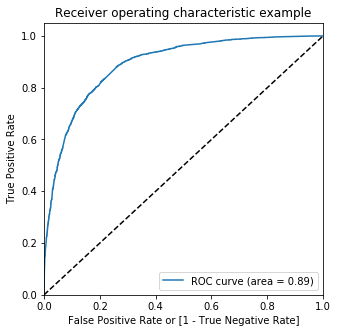

In [186]:
#lets fit the ROC curve
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted,
                                         y_train_pred_final.Convert_Prob, drop_intermediate = False )
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Convert_Prob)

In [180]:
#let's check the accuracy,sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensitivity','specificity','precision','recall'])
from sklearn.metrics import confusion_matrix

num = [0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1,0.0]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    
    precision = cm1[1,1]/(cm1[1,1]+cm1[0,1])
    recall = cm1[1,1]/(cm1[1,1]+cm1[1,0])
    
    cutoff_df.loc[i] =[i, accuracy, sensitivity, specificity, recall, precision ]
print(cutoff_df)

     prob  accuracy  sensitivity  specificity  precision    recall
0.9   0.9  0.714057     0.270737     0.986050   0.270737  0.922525
0.8   0.8  0.759686     0.423158     0.966159   0.423158  0.884683
0.7   0.7  0.783541     0.514105     0.948850   0.514105  0.860465
0.6   0.6  0.807237     0.631579     0.915009   0.631579  0.820120
0.5   0.5  0.817963     0.708632     0.885043   0.708632  0.790883
0.4   0.4  0.815082     0.776421     0.838801   0.776421  0.747164
0.3   0.3  0.793628     0.879579     0.740894   0.879579  0.675614
0.2   0.2  0.761287     0.921684     0.662878   0.921684  0.626503
0.1   0.1  0.610951     0.978526     0.385430   0.978526  0.494153
0.0   0.0  0.380243     1.000000     0.000000   1.000000  0.380243


<Figure size 864x1152 with 0 Axes>

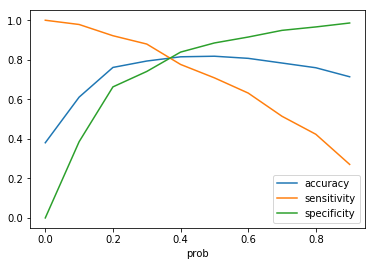

In [183]:
# Let's visulaize the above table to undertstand the variations for different probability cutoff's
plt.figure(figsize = (12, 16))
cutoff_df.plot.line(x='prob', y=['accuracy','sensitivity','specificity'])
plt.show()

From the above graph, we see that at 0.36 all the features are achievable

However once we check the Rate we would be to finalize on it

In [184]:
# Predicting final_predicted for leads
y_train_pred_final['final_predicted'] = y_train_pred_final.Convert_Prob.map( lambda x: 1 if x > 0.36 else 0)

y_train_pred_final.head()

,Converted,Convert_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.528555,6676,1,1,1,1,1,1,1,0,0,0,0,1
1,1,0.739707,6138,1,1,1,1,1,1,1,1,1,0,0,1
2,1,0.913230,8650,1,1,1,1,1,1,1,1,1,1,1,1
3,0,0.032917,3423,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.117693,6552,0,1,1,0,0,0,0,0,0,0,0,0


In [187]:
# Let's check the overall accuracy.
acc = metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
print(acc)

0.8091578610310599


teh accuracy is almost nearer to 0.81

lets check how other features turn out to be

In [188]:
confusionM_2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusionM_2

array([[3157,  714],
       [ 478, 1897]], dtype=int64)

In [189]:
from sklearn.metrics import confusion_matrix
#True negative
TN = confusionM_2[0,0] 
#False positives
FP = confusionM_2[0,1] 
#False negatives
FN = confusionM_2[1,0] 
#True Positive
TP = confusionM_2[1,1]

In [190]:
# Let's check the sensitivity and specificity of our logistic regression model
print("Sensitivity=",(TP / (TP+FN)))

print("Specificity=",(TN / (TN+FP)))

Sensitivity= 0.7987368421052632
Specificity= 0.8155515370705244


In [191]:
# Calculate false postive rate - which says how much is showing as converted, when actually not converted
print("false postive rate =",(FP/ (TN+FP)))

false postive rate = 0.1844484629294756


In [192]:
# Positive predictive rate
print("Positive predictive rate =",(TP / (TP+FP)))


# Negative predictive rate
print("Negative predictive rate =",(TN / float(TN+ FN)))

Positive predictive rate = 0.7265415549597856
Negative predictive rate = 0.8685006877579092


As we can see that the positive prediction rate is only 0.72 

lets stick on to cut off value at 0.5 as we even had the accuracy greater than this

In [209]:
#lets get the  final_predicted for leads

y_train_pred_final['final_predicted'] = y_train_pred_final.Convert_Prob.map( lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Converted,Convert_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.528555,6676,1,1,1,1,1,1,1,0,0,0,0,1
1,1,0.739707,6138,1,1,1,1,1,1,1,1,1,0,0,1
2,1,0.913230,8650,1,1,1,1,1,1,1,1,1,1,1,1
3,0,0.032917,3423,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.117693,6552,0,1,1,0,0,0,0,0,0,0,0,0


In [210]:
# Let's see the accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8179634966378482

In [211]:
confusionM_F = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusionM_F

array([[3426,  445],
       [ 692, 1683]], dtype=int64)

In [212]:
from sklearn.metrics import confusion_matrix
#True negative
TN = confusionM_F[0,0] 
#False positives
FP = confusionM_F[0,1] 
#False negatives
FN = confusionM_F[1,0] 
#True Positive
TP = confusionM_F[1,1]

In [213]:
# Let's check the sensitivity and specificity of our logistic regression model
print("Sensitivity=",(TP / (TP+FN)))

print("Specificity=",(TN / (TN+FP)))

Sensitivity= 0.7086315789473684
Specificity= 0.8850426246447947


In [214]:
# Calculate false postive rate - which says how much is showing as converted, when actually not converted
print("false postive rate =",(FP/ (TN+FP)))

false postive rate = 0.11495737535520538


In [215]:
# Positive predictive rate
print("Positive predictive rate =",(TP / (TP+FP)))


# Negative predictive rate
print("Negative predictive rate =",(TN / float(TN+ FN)))

Positive predictive rate = 0.7908834586466166
Negative predictive rate = 0.8319572608062166


# Lets check the predictions on test data

In [216]:
#scaling the data
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_test[['TotalVisits','Total Time Spent on Website',
                                                                                           'Page Views Per Visit']])

X_test.head()

C:\Users\metimats\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\metimats\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\metimats\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\metimats\AppData\Local\Continuum\anaconda3\lib\si

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Google,...,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Unreachable
7625,0,-0.397342,2.145058,-0.164140,1,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
5207,0,0.277837,0.772700,0.876565,1,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
2390,0,-1.072521,-0.885722,-1.204846,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4362,0,-0.397342,-0.451952,-0.164140,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
1023,0,3.991321,-0.293028,1.396918,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [217]:
# applying the trained one from the train dataset to test dataset
X_test = X_test[col]

# Adding constant
X_test_sm = sm.add_constant(X_test)
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Organic Search,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,What is your current occupation_Other,What is your current occupation_Working Professional,Last Notable Activity_Unreachable
7625,0,-0.397342,2.145058,0,1,0,0,0,0,0,0,0,0,0,0,0
5207,0,0.277837,0.772700,0,1,0,0,0,0,0,0,0,0,0,0,0
2390,0,-1.072521,-0.885722,1,0,0,0,0,0,0,0,0,1,0,0,0
4362,0,-0.397342,-0.451952,0,0,1,0,0,0,0,0,0,1,0,0,0
1023,0,3.991321,-0.293028,0,1,0,0,0,0,0,0,0,0,0,0,0


In [218]:
# predicting the value
y_test_pred = res.predict(X_test_sm)

# Converting y_test_pred to a dataframe 
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
7625,0.704232
5207,0.376488
2390,0.945249
4362,0.438270
1023,0.276035


In [219]:
# Converting y_test to a dataframe
y_test_df = pd.DataFrame(y_test)

# assigning the LeadID as index
y_test_df['LeadID'] = y_test_df.index
y_test_df.head()

,Converted,LeadID
7625,0,7625
5207,1,5207
2390,1,2390
4362,0,4362
1023,0,1023


In [220]:
# Removing index of dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,LeadID,0
0,0,7625,0.704232
1,1,5207,0.376488
2,1,2390,0.945249
3,0,4362,0.438270
4,0,1023,0.276035


In [222]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Convert_Prob'})

y_pred_final.head()

,LeadID,Converted,Convert_Prob
0,7625,0,0.704232
1,5207,1,0.376488
2,2390,1,0.945249
3,4362,0,0.438270
4,1023,0,0.276035


In [223]:
y_pred_final['final_predicted'] = y_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.50 else 0)
y_pred_final.head()

,LeadID,Converted,Convert_Prob,final_predicted
0,7625,0,0.704232,1
1,5207,1,0.376488,0
2,2390,1,0.945249,1
3,4362,0,0.438270,0
4,1023,0,0.276035,0


In [225]:
# lets check the accuracy
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8174010455563854

In [226]:
confusion_T = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion_T

array([[1491,  193],
       [ 296,  698]], dtype=int64)

In [227]:
from sklearn.metrics import confusion_matrix
#True negative
TN = confusion_T[0,0] 
#False positives
FP = confusion_T[0,1] 
#False negatives
FN = confusion_T[1,0] 
#True Positive
TP = confusion_T[1,1]

In [228]:
# Let's check the sensitivity and specificity of our logistic regression model
print("Sensitivity=",(TP / (TP+FN)))

print("Specificity=",(TN / (TN+FP)))

Sensitivity= 0.7022132796780685
Specificity= 0.8853919239904988


In [229]:
# Calculate false postive rate - which says how much is showing as converted, when actually not converted
print("false postive rate =",(FP/ (TN+FP)))

false postive rate = 0.11460807600950118


In [230]:
# Positive predictive rate
print("Positive predictive rate =",(TP / (TP+FP)))


# Negative predictive rate
print("Negative predictive rate =",(TN / float(TN+ FN)))

Positive predictive rate = 0.7833894500561167
Negative predictive rate = 0.8343592613318411


In [231]:
# Inspecting final predicted train dataframe
y_train_pred_final.head()

,Converted,Convert_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.528555,6676,1,1,1,1,1,1,1,0,0,0,0,1
1,1,0.739707,6138,1,1,1,1,1,1,1,1,1,0,0,1
2,1,0.913230,8650,1,1,1,1,1,1,1,1,1,1,1,1
3,0,0.032917,3423,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.117693,6552,0,1,1,0,0,0,0,0,0,0,0,0


In [232]:
# Selecting only required columns
y_train_lead_score = y_train_pred_final[['Convert_Prob','Converted','LeadID','final_predicted']]

# Calculating lead_score
y_train_lead_score['Lead_Score'] = round(y_train_lead_score['Convert_Prob']*100, 2)
y_train_lead_score.head()

C:\Users\metimats\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,Convert_Prob,Converted,LeadID,final_predicted,Lead_Score
0,0.528555,1,6676,1,52.86
1,0.739707,1,6138,1,73.97
2,0.913230,1,8650,1,91.32
3,0.032917,0,3423,0,3.29
4,0.117693,0,6552,0,11.77


In [233]:
# Selecting only required columns
y_test_lead_score = y_pred_final

# Calculating lead_score
y_test_lead_score['Lead_Score'] = round(y_test_lead_score['Convert_Prob']*100, 2)
y_test_lead_score.head()

,LeadID,Converted,Convert_Prob,final_predicted,Lead_Score
0,7625,0,0.704232,1,70.42
1,5207,1,0.376488,0,37.65
2,2390,1,0.945249,1,94.52
3,4362,0,0.438270,0,43.83
4,1023,0,0.276035,0,27.60


In [234]:
# Concatenating train and test dataframe with lead score
lead_score_calculation = pd.concat(objs = [y_train_lead_score, y_test_lead_score], axis=0, join='outer')

# Inspecting shape of whole dataframe
print(lead_score_calculation.shape)

lead_score_calculation.head()

(8924, 5)


C:\Users\metimats\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,Convert_Prob,Converted,LeadID,Lead_Score,final_predicted
0,0.528555,1,6676,52.86,1
1,0.739707,1,6138,73.97,1
2,0.913230,1,8650,91.32,1
3,0.032917,0,3423,3.29,0
4,0.117693,0,6552,11.77,0


3. X Education has a period of 2 months every year during which they hire some interns. The sales team, in particular, has around 10 interns allotted to them. So during this phase, they wish to make the lead conversion more aggressive. So they want almost all of the potential leads (i.e. the customers who have been predicted as 1 by the model) to be converted and hence, want to make phone calls to as much of such people as possible. Suggest a good strategy they should employ at this stage.

To make the lead conversion more aggressive, we can build the model in such a way that we do not miss out on any potential lead. This can be done by reducing cut-off probability, i.e, the threshold of it. In this way we can predict more customers as 'HOT LEADS'. If we take the cut off as 0.15, we can achieve a True Positive Rate of around 93%.

In [235]:
y_pred_final['final_predicted'] = y_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.15 else 0)
y_pred_final.head()

,LeadID,Converted,Convert_Prob,final_predicted,Lead_Score
0,7625,0,0.704232,1,70.42
1,5207,1,0.376488,1,37.65
2,2390,1,0.945249,1,94.52
3,4362,0,0.438270,1,43.83
4,1023,0,0.276035,1,27.60


In [236]:
##### Let's check the overall accuracy on test data
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7057505601194921

In [237]:
confusion_n = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion_n

array([[958, 726],
       [ 62, 932]], dtype=int64)

In [238]:
from sklearn.metrics import confusion_matrix
#True negative
TN = confusion_n[0,0] 
#False positives
FP = confusion_n[0,1] 
#False negatives
FN = confusion_n[1,0] 
#True Positive
TP = confusion_n[1,1]

In [239]:
# Let's check the sensitivity and specificity of our logistic regression model
print("Sensitivity=",(TP / (TP+FN)))


Sensitivity= 0.937625754527163


Q4. At times, the company reaches its target for a quarter before the deadline. During this time, the company wants the sales team to focus on some new work as well. So during this time, the company’s aim is to not make phone calls unless it’s extremely necessary, i.e. they want to minimize the rate of useless phone calls. Suggest a strategy they should employ at this stage.

To reduce the rate of phone calls dialed, we can build the model in such a way that we predict only those customers as hot leads which have a very high probability of conversion. This can be acheived by increasing cut-off probability, i.e, the threshold. This way we can predict less customers as 'HOT LEADS'. If we take the threshold probability as 0.8, we have Positive Predicted Value of around 90%, and False Positive Rate is only 3% 

In [240]:
y_pred_final['final_predicted'] = y_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.8 else 0)
y_pred_final.head()

,LeadID,Converted,Convert_Prob,final_predicted,Lead_Score
0,7625,0,0.704232,0,70.42
1,5207,1,0.376488,0,37.65
2,2390,1,0.945249,1,94.52
3,4362,0,0.438270,0,43.83
4,1023,0,0.276035,0,27.60


In [241]:
##### Let's check the overall accuracy on test data
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7710978342046303

In [246]:
confusion_f = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion_f

array([[1628,   56],
       [ 557,  437]], dtype=int64)

In [247]:
from sklearn.metrics import confusion_matrix
#True negative
TN = confusion_f[0,0] 
#False positives
FP = confusion_f[0,1] 
#False negatives
FN = confusion_f[1,0] 
#True Positive
TP = confusion_f[1,1]

In [248]:
# Let's check the sensitivity and specificity of our logistic regression model
print("Sensitivity=",(TP / (TP+FN)))

print("Specificity=",(TN / (TN+FP)))

Sensitivity= 0.4396378269617706
Specificity= 0.9667458432304038


In [249]:
#False Positive Rate (1-specificity)
print(1-(TN/float(TN+FP)))

0.0332541567695962
